# Perceptron Trick - Classification

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [7]:
# Creating synthetic classification dataset

x,y = make_classification(n_samples = 100, 
                          n_features = 2, 
                          n_informative = 1, 
                          n_classes = 2, 
                          random_state = 30, 
                          n_redundant = 0,
                          n_clusters_per_class = 1,
                         class_sep = 3)

Text(0, 0.5, 'Y')

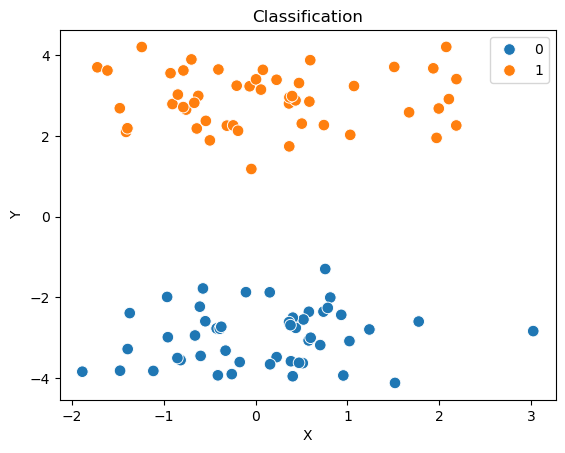

In [8]:
# Plotting the data 
sns.scatterplot(x = x[:,0], y = x[:,1], hue = y,s = 70)
plt.title("Classification")
plt.xlabel("X")
plt.ylabel("Y")

In [9]:
# splitting the data

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.2,
                                                random_state = 20)

In [24]:
# Creating Perceptron Class

class Perceptron_step:
    def __init__(self,learning_rate = 0.01,epochs = 200):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self,x_train,y_train):
        X = np.insert(x_train,0,1,axis = 1)
        Y = np.array(y_train)

        self.weights = np.ones(X.shape[1])

        for i in range(self.epochs):
            sample = np.random.randint(0,X.shape[0])

            x_i = X[sample]
            y_i = Y[sample]

            y_hat = step(x_i,self.weights)

            self.weights = self.weights + ((self.learning_rate*(y_i - y_hat))*x_i)
            
        self.intercept_ = self.weights[0]
        self.coef_ = self.weights[1:]

        print(self.intercept_,self.coef_)

 
    def predict(self,x_test):
        X = np.insert(x_test,0,1,axis = 1)
        output = X @ self.weights
        y_pred = np.where(output>=0,1,0)
        return y_pred
        
    

In [25]:
def step(x,weights):
    return 1 if (x @ weights) >= 0 else 0

In [26]:
percept = Perceptron_step(learning_rate = 0.01,epochs = 500)

In [27]:
percept.fit(x_train,y_train)

0.8999999999999999 [0.80089997 1.21939496]


In [28]:
y_pred = percept.predict(x_test)

In [29]:
print("Accuarcy : ",accuracy_score(y_test,y_pred))

Accuarcy :  1.0


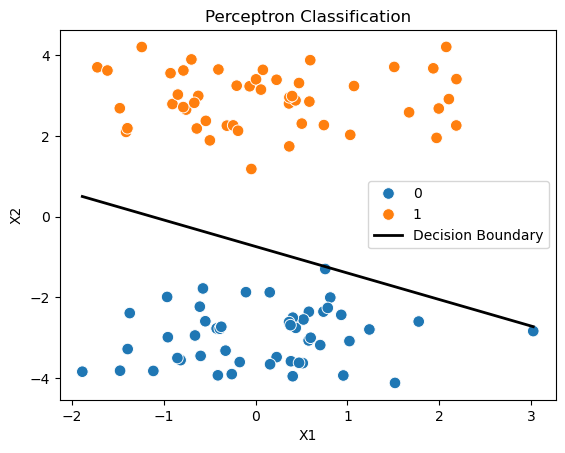

In [50]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y, s=70)

w0 = percept.intercept_
w1, w2 = percept.coef_

x1_vals = np.linspace(x[:,0].min(), x[:,0].max(), 100)

x2_vals = -(w1/w2) * x1_vals - (w0/w2)

plt.plot(x1_vals, x2_vals, color='black', linewidth=2, label='Decision Boundary')

# Labels and title
plt.title("Perceptron Classification")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


In [43]:
# Creating Perceptron Class

class Perceptron_sigmoid:
    def __init__(self,learning_rate = 0.01,epochs = 200):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self,x_train,y_train):
        X = np.insert(x_train,0,1,axis = 1)
        Y = np.array(y_train)

        self.weights = np.ones(X.shape[1])

        for i in range(self.epochs):
            sample = np.random.randint(0,X.shape[0])

            x_i = X[sample]
            y_i = Y[sample]

            y_hat = sigmoid(x_i,self.weights)

            self.weights += self.learning_rate * (y_i - y_hat) * y_hat * (1 - y_hat) * x_i

            
        self.intercept_ = self.weights[0]
        self.coef_ = self.weights[1:]

        print(self.intercept_,self.coef_)

 
    def predict(self,x_test):
        X = np.insert(x_test, 0, 1, axis=1)
        output = 1 / (1 + np.exp(-(X @ self.weights)))
        y_pred = np.where(output >= 0.5, 1, 0)
        return y_pred

In [44]:
def sigmoid(x,weights):
    z = x @ weights
    return (1 / (1+ np.exp(-z)))

In [71]:
percept_sigmoid = Perceptron_sigmoid(learning_rate = 0.2, epochs = 2000)

In [72]:
percept_sigmoid.fit(x_train,y_train)

0.5562070096594366 [0.49720312 2.00580759]


In [73]:
sigmoid_pred = percept_sigmoid.predict(x_test)

In [74]:
print("Accuracy : ",accuracy_score(y_test,sigmoid_pred))

Accuracy :  1.0


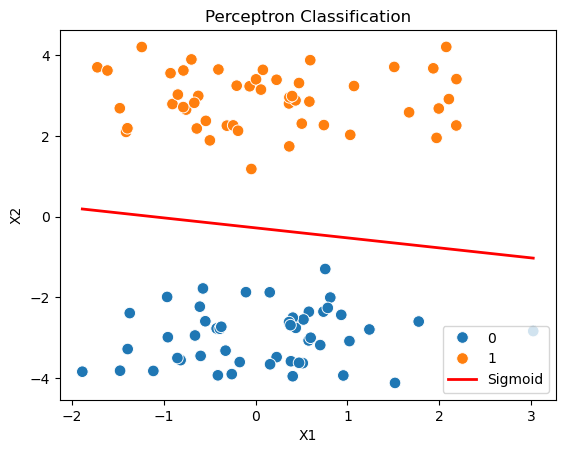

In [75]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y, s=70)

w0 = percept_sigmoid.intercept_
w1, w2 = percept_sigmoid.coef_

x1_vals = np.linspace(x[:,0].min(), x[:,0].max(), 100)

x2_vals = -(w1/w2) * x1_vals - (w0/w2)

plt.plot(x1_vals, x2_vals, color='Red', linewidth=2, label='Sigmoid')

# Labels and title
plt.title("Perceptron Classification")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()
